100%|██████████| 430/430 [00:23<00:00, 17.92it/s]


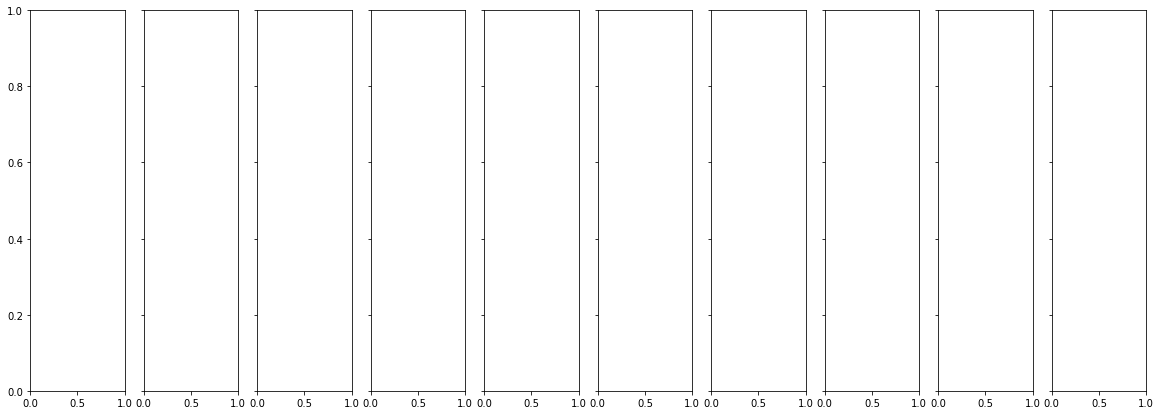

In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf; tf.compat.v1.disable_eager_execution()
from keras import backend as K
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, Lambda, Reshape
from keras.models import Model
#from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from matplotlib.pyplot import imshow
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
np.random.seed(25)
tf.executing_eagerly()

SIZE=512
from tqdm import tqdm
img_data=[]
path1 = 'Scene/v1'
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,1)   #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') /(SIZE-1)
X_train = img_array

fig, axes = plt.subplots(ncols=10, sharex=False,
    sharey=True, figsize=(20, 7))
counter = 0

# Normalize values such that all numbers are within
# the range of 0 to 1

# Convert from (no_of_data, 256, 256) to (no_of_data, 256, 256, 3)
X_train_new = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)


# Defining some variables
img_height   = X_train_new.shape[1]    # 256
img_width    = X_train_new.shape[2]    # 256
num_channels = X_train_new.shape[3]    # 3
input_shape =  (img_height, img_width, num_channels)   # (256,256,3)
latent_dim = 2    # Dimension of the latent space


Train on 430 samples
Epoch 1/400
430/430 [==============================] - 57s 132ms/sample - loss: 181701.1906
Epoch 2/400
430/430 [==============================] - 56s 131ms/sample - loss: 181686.9005
Epoch 3/400
430/430 [==============================] - 58s 135ms/sample - loss: 181672.4246
Epoch 4/400
430/430 [==============================] - 62s 144ms/sample - loss: 181652.3920
Epoch 5/400
430/430 [==============================] - 62s 145ms/sample - loss: 181622.6850
Epoch 6/400
430/430 [==============================] - 61s 141ms/sample - loss: 181580.6488
Epoch 7/400
430/430 [==============================] - 53s 122ms/sample - loss: 181527.2998
Epoch 8/400
430/430 [==============================] - 51s 118ms/sample - loss: 181459.0499
Epoch 9/400
430/430 [==============================] - 50s 117ms/sample - loss: 181375.4322
Epoch 10/400
430/430 [==============================] - 6379s 15s/sample - loss: 181275.6531
Epoch 11/400
430/430 [==============================] - 50

Epoch 89/400
430/430 [==============================] - 50s 116ms/sample - loss: 145613.4370
Epoch 90/400
430/430 [==============================] - 50s 116ms/sample - loss: 145404.5847
Epoch 91/400
430/430 [==============================] - 50s 116ms/sample - loss: 145205.0116
Epoch 92/400
430/430 [==============================] - 50s 116ms/sample - loss: 145003.0643
Epoch 93/400
430/430 [==============================] - 50s 117ms/sample - loss: 144814.4074
Epoch 94/400
430/430 [==============================] - 50s 116ms/sample - loss: 144623.0679
Epoch 95/400
430/430 [==============================] - 50s 116ms/sample - loss: 144448.4177
Epoch 96/400
430/430 [==============================] - 50s 116ms/sample - loss: 144264.9961
Epoch 97/400
430/430 [==============================] - 51s 119ms/sample - loss: 144089.5795
Epoch 98/400
430/430 [==============================] - 50s 116ms/sample - loss: 143918.9142
Epoch 99/400
430/430 [==============================] - 50s 117ms/samp

430/430 [==============================] - 50s 116ms/sample - loss: 134806.8565
Epoch 264/400
430/430 [==============================] - 50s 115ms/sample - loss: 134789.5007
Epoch 265/400
430/430 [==============================] - 50s 117ms/sample - loss: 134772.7322
Epoch 266/400
430/430 [==============================] - 50s 116ms/sample - loss: 134753.9968
Epoch 267/400
430/430 [==============================] - 50s 116ms/sample - loss: 134739.6442
Epoch 268/400
430/430 [==============================] - 50s 116ms/sample - loss: 134722.6840
Epoch 269/400
430/430 [==============================] - 50s 116ms/sample - loss: 134706.4111
Epoch 270/400
430/430 [==============================] - 50s 116ms/sample - loss: 134689.8378
Epoch 271/400
430/430 [==============================] - 50s 116ms/sample - loss: 134672.0056
Epoch 272/400
430/430 [==============================] - 50s 115ms/sample - loss: 134657.7580
Epoch 273/400
430/430 [==============================] - 50s 116ms/sample 

/home/killer/anaconda3/lib/python3.8/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


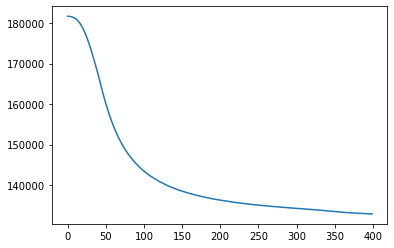

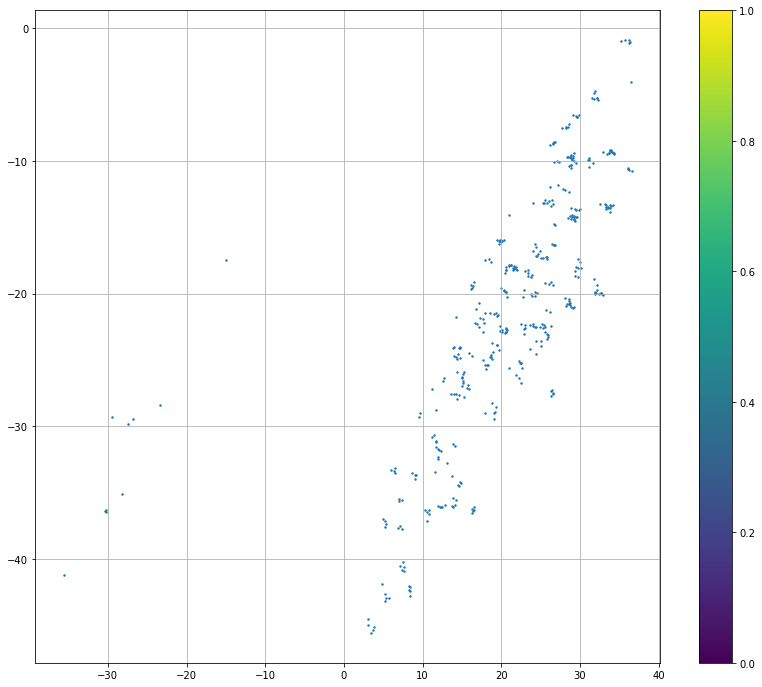

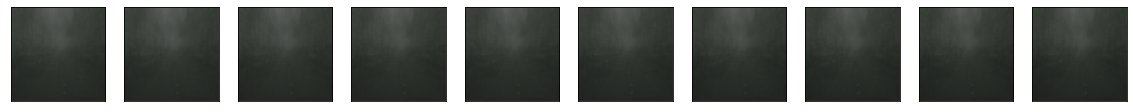

In [5]:


# A function to compute the value of latent space
def compute_latent(x):
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.int_shape(mu)[1]
    eps = K.random_normal(shape=(batch,dim))
    return mu + K.exp(sigma/2)*eps

# The loss function for VAE
def kl_reconstruction_loss(true, pred):
    # Reconstruction loss (binary crossentropy)
    reconstruction_loss = binary_crossentropy(K.flatten(true), K.flatten(pred)) * img_width * img_height

    # KL divergence loss
    kl_loss = 1 + sigma - K.square(mu) - K.exp(sigma)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    # Total loss = 50% rec + 50% KL divergence loss
    return K.mean(reconstruction_loss + kl_loss)

# A function to display image sequence
def display_image_sequence(x_start, y_start, x_end, y_end, no_of_imgs):
    x_axis = np.linspace(x_start,x_end,no_of_imgs)
    y_axis = np.linspace(y_start,y_end,no_of_imgs)
    
    x_axis = x_axis[:, np.newaxis]
    y_axis = y_axis[:, np.newaxis]
    
    new_points = np.hstack((x_axis, y_axis))
    new_images = decoder.predict(new_points)
    new_images = new_images.reshape(new_images.shape[0], new_images.shape[1], new_images.shape[2],new_images.shape[3])
    x=array_to_img(new_images[no_of_imgs/2])
    x.save('#.jpg')
    # Display some images
    fig, axes = plt.subplots(ncols=no_of_imgs, sharex=False,
                             sharey=True, figsize=(20, 7))
    counter = 0
    plt.imsave('test.png',new_images[int(no_of_imgs/2)],cmap='autumn_r')
    for i in range(no_of_imgs):
        axes[counter].imshow(new_images[i], cmap='autumn_r')
        axes[counter].get_xaxis().set_visible(False)
        axes[counter].get_yaxis().set_visible(False)
        counter += 1
    plt.show()

# Constructing encoder
encoder_input = Input(shape=input_shape)
encoder_conv = Conv2D(filters=4, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder_conv = Conv2D(filters=8, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder_conv = Conv2D(filters=16, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder_conv = Conv2D(filters=32, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder_conv = Conv2D(filters=64, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder = Flatten()(encoder_conv)

mu = Dense(latent_dim)(encoder)
sigma = Dense(latent_dim)(encoder)

latent_space = Lambda(compute_latent, output_shape=(latent_dim,))([mu, sigma])

# Take the convolution shape to be used in the decoder
conv_shape = K.int_shape(encoder_conv)

# Constructing decoder
decoder_input = Input(shape=(latent_dim,))
decoder = Dense(conv_shape[1]*conv_shape[2]*conv_shape[3], activation='relu')(decoder_input)
decoder = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(decoder)
decoder_conv = Conv2DTranspose(filters=64, kernel_size=3, strides=2, 
                            padding='same', activation='relu')(decoder)
decoder_conv = Conv2DTranspose(filters=32, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv = Conv2DTranspose(filters=16, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv = Conv2DTranspose(filters=8, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv = Conv2DTranspose(filters=4, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv =  Conv2DTranspose(filters=num_channels, kernel_size=3, 
                          padding='same', activation='sigmoid')(decoder_conv)

# Actually build encoder, decoder and the entire VAE
encoder = Model(encoder_input, latent_space)
decoder = Model(decoder_input, decoder_conv)
vae = Model(encoder_input, decoder(encoder(encoder_input)))

# Compile the model using KL loss
opt=Adam(learning_rate= )
vae.compile(optimizer=opt,loss=kl_reconstruction_loss)

# Training VAE
history = vae.fit(x=X_train_new, y=X_train_new, epochs=400, batch_size=21)

# Plotting loss value decrease
plt.plot(history.history['loss'])


# Transform images to points in latent space using encoder
encoded = encoder.predict(X_train_new)

# Displaying images in latent space
plt.figure(figsize=(14,12))
plt.scatter(encoded[:,0], encoded[:,1], s=2, cmap='hsv')
plt.colorbar()
plt.grid()
plt.show()

display_image_sequence(encoded[10,0],encoded[10,1],encoded[12,0],encoded[12,1],10)

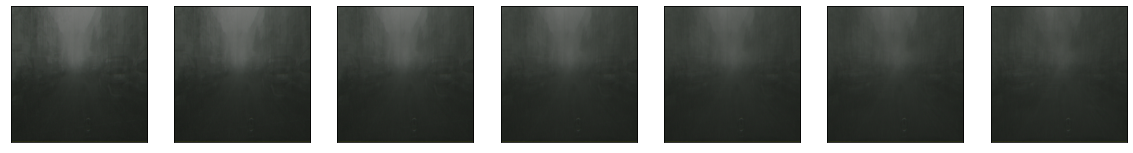

In [21]:
from keras.preprocessing.image import array_to_img #total 430 images which are all rainy
x1=429
x2=12
x=array_to_img(X_train[x1])
x.save('PIC1.jpg')
x=array_to_img(X_train[x2])
x.save('PIC2.jpg')
display_image_sequence(encoded[x1,0],encoded[x1,1],encoded[x2,0],encoded[x2,1],7)